# Preprocessing for Character Recognition


This step is important as when a user takes a picture, it is prone to have noise or skewing and lighting problems. To make our model work with higher accuracy, before inferencing, we have to clean up and get ready the image.

<!-- Preprocessing pipeline has 7 major steps: -->
<!-- 1. Normalization
2. Skew Correction
3. Image Scaling
4. Noise Removal
5. Thinning and Skeletonization
6. Grayscale Image
7. Thresholding or Binarization -->

## Dependencies

In [100]:
import math
from typing import Tuple, Union
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2

from deskew import determine_skew


In [101]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

## Open an Image

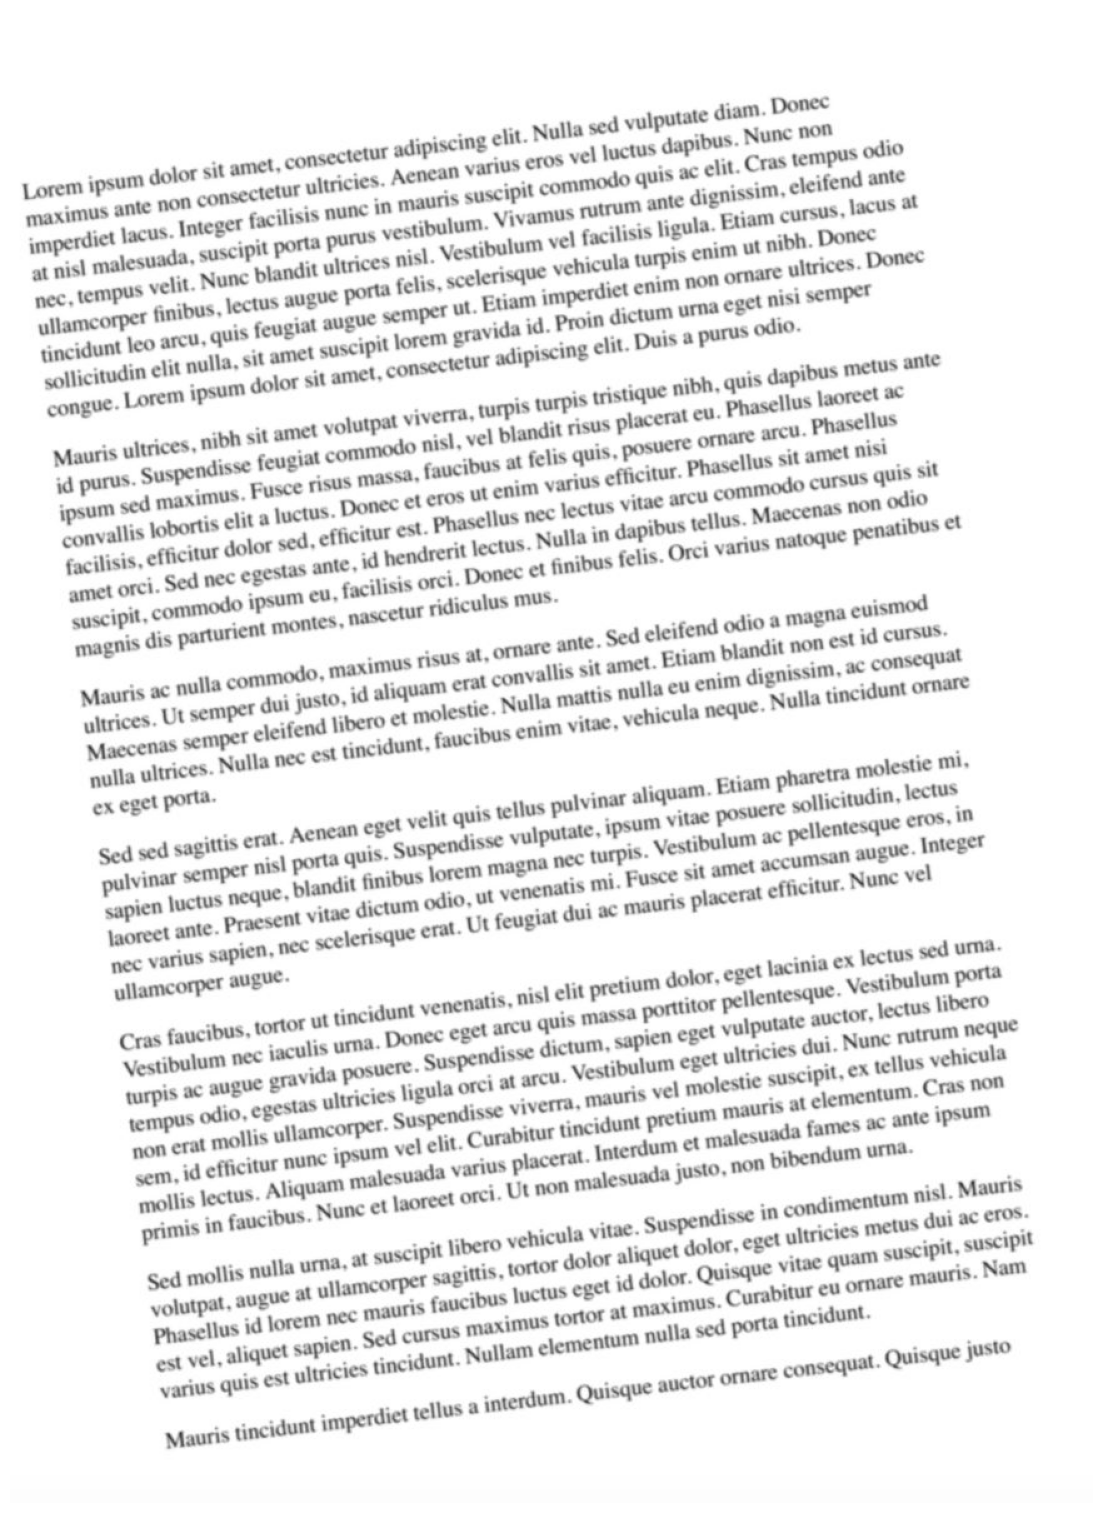

In [102]:
file = "./skewed_page.jpg"
img = cv2.imread(file)
display(file)

## 1. Normalize the Image

In [103]:
def normalize(image: np.ndarray) -> np.ndarray:
    norm_img = np.zeros((image.shape[0], image.shape[1]))
    processed = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    return processed    

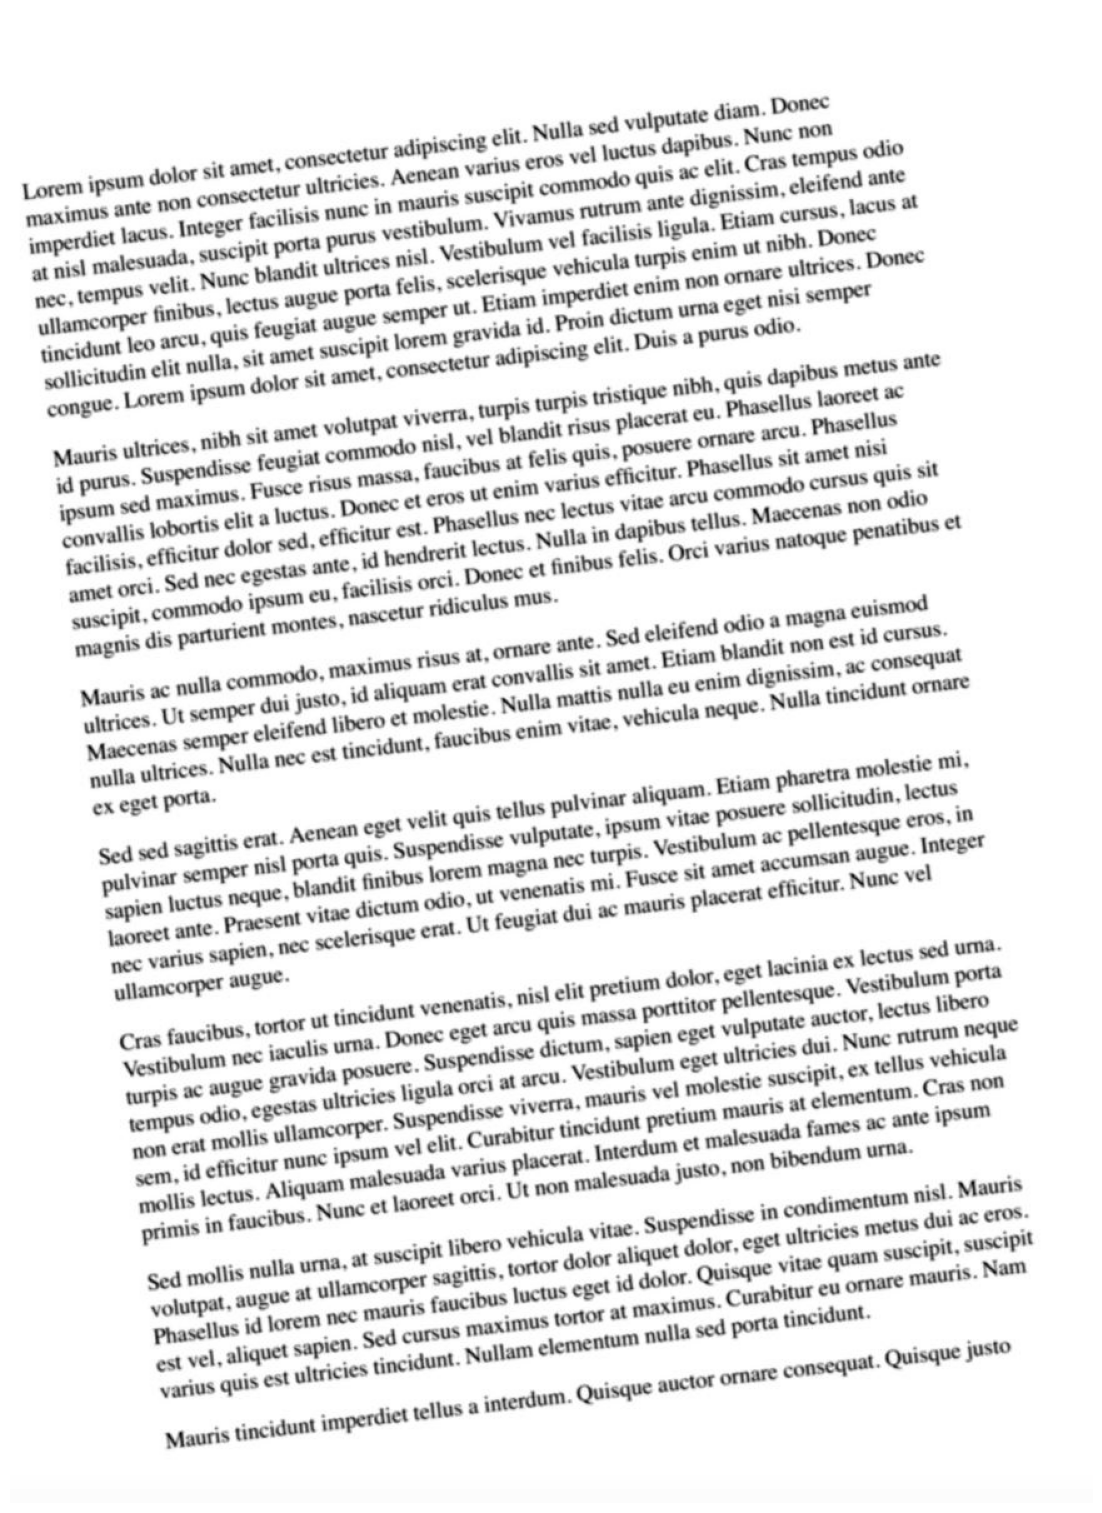

In [104]:
normalized = normalize(img)
cv2.imwrite("./temp/normalized.jpg", normalized)
display("./temp/normalized.jpg")

## 2. Deskewing

In [105]:
def rotate(image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

In [106]:
def deskew(image: np.ndarray) -> np.ndarray:
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    angle = determine_skew(grayscale)
    deskewed = rotate(image, angle, (0, 0, 0))
    return deskewed

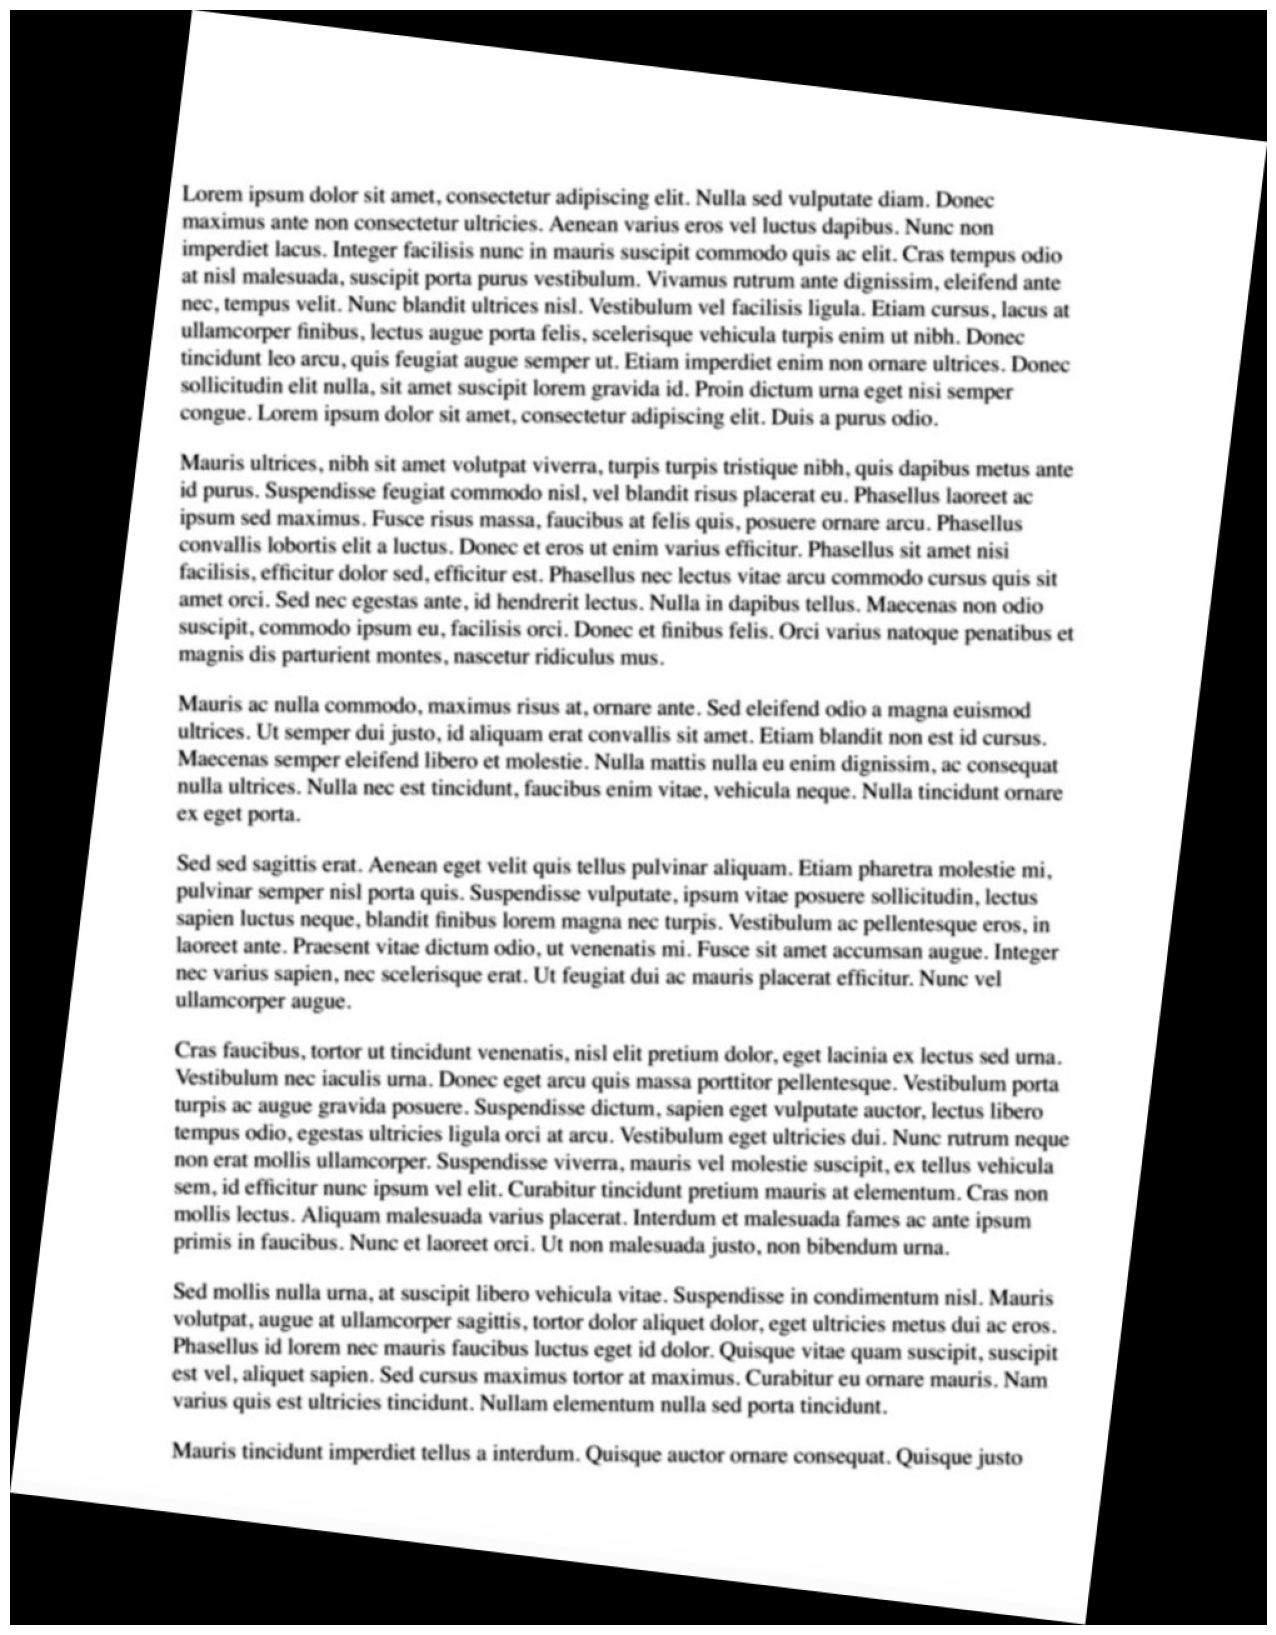

In [107]:
deskewed = deskew(normalized)
cv2.imwrite("./temp/deskewed.jpg", deskewed)
display("./temp/deskewed.jpg")

## 3. Noise Removal

In [108]:
def remove_noise(image: np.ndarray) -> np.ndarray:
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

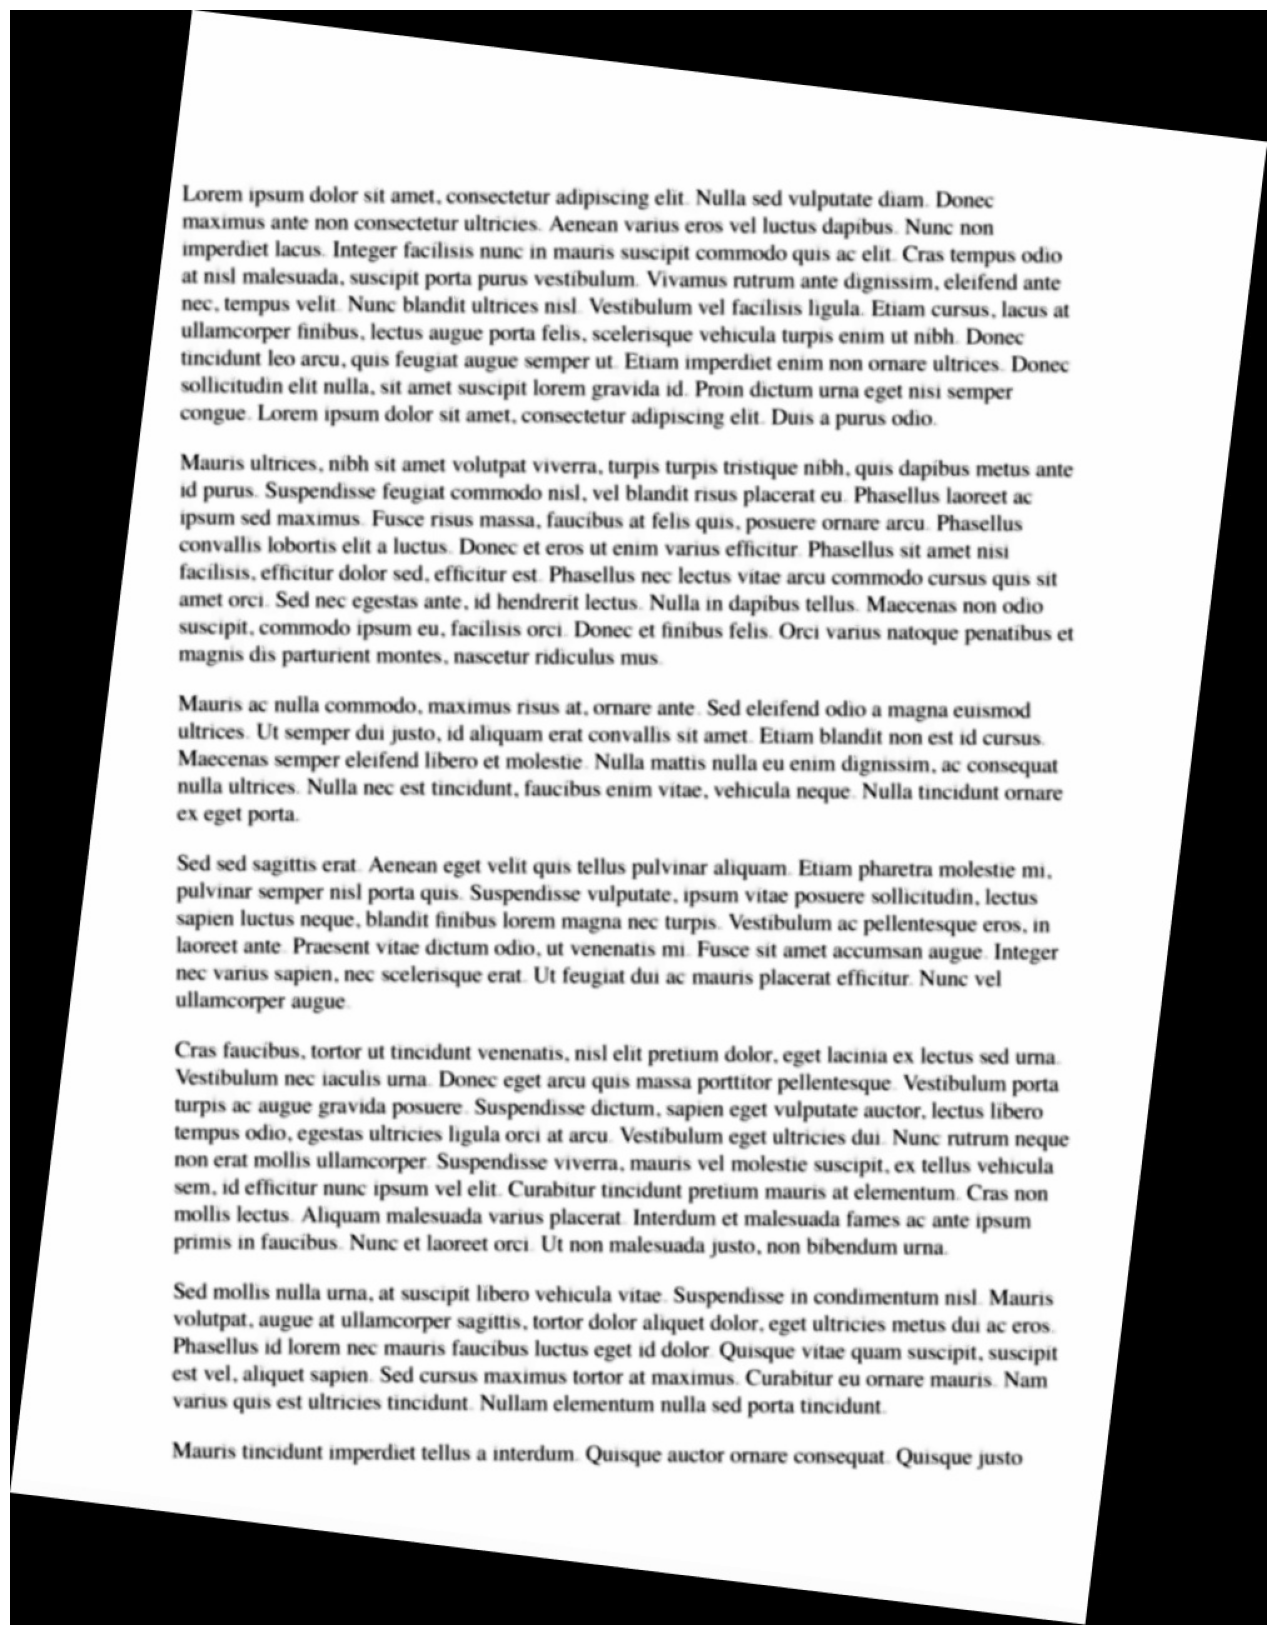

In [109]:
denoised = remove_noise(deskewed)
cv2.imwrite("./temp/denoised.jpg", denoised)
display("./temp/denoised.jpg")